Precisión del modelo: 90.00%


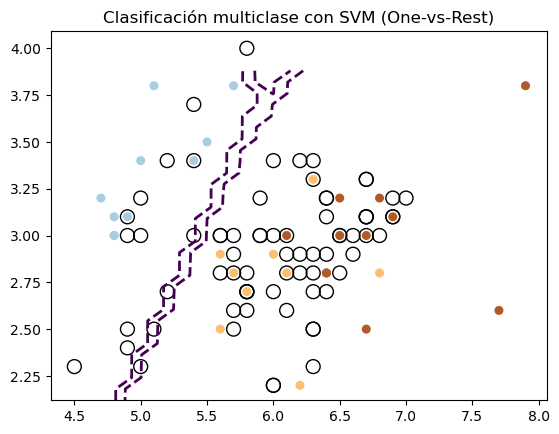

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargamos el dataset de Iris
iris = datasets.load_iris()
X = iris.data[:, :2]  # Usamos solo las dos primeras características para facilidad de visualización
y = iris.target

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo SVM multiclase con un kernel lineal
svm_model = SVC(kernel='linear', decision_function_shape='ovr')

# Entrenamos el modelo
svm_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = svm_model.predict(X_test)

# Calculamos la precisión
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

# Función para graficar el resultado de clasificación
def plot_svm_multiclass(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Dibujar el hiperplano para cada clase
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    # Graficar hiperplanos para cada clase (one-vs-rest)
    for i, class_label in enumerate(np.unique(y)):
        Z = model.decision_function(xy)[:, i].reshape(XX.shape)
        ax.contour(XX, YY, Z, levels=[0], linewidths=2, linestyles='--')

    # Dibujar los vectores soporte
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

# Graficamos la clasificación
plt.figure()
plot_svm_multiclass(X_test, y_test, svm_model)
plt.title('Clasificación multiclase con SVM (One-vs-Rest)')
plt.show()
